In [5]:
import pandas as pd

df = pd.read_csv("/content/data.csv")
df.head()


,reviewer_name,reviewer_rating,review_title,review_text,place_of_review,Date_of_review,up_votes,Down_votes
0,Subhro Banerjee,5,Worth every penny,Great product 🤗 with great deals 😍😍 Tata Tea G...,"Certified Buyer, Budge Budge",Subhro Banerjee,236,59
1,Shiv chandra Jha,5,Great product,Very nice and super qwality tea taste are grea...,"Certified Buyer, Saharsa",Shiv chandra Jha,225,79
2,Flipkart Customer,5,Highly recommended,Great test great quality great price point tim...,"Certified Buyer, Sri Ganganagar",Flipkart Customer,89,27
3,DTH Y,4,Very Good,Nice 😊READ MORE,"Certified Buyer, Phaltan",DTH Y,30,6
4,Bhavesh Godhani,5,Classy product,Very Good Tata tea product.READ MORE,"Certified Buyer, Ahmedabad",Bhavesh Godhani,69,22


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower() # Convert to string and lowercase
    text = re.sub(r'http\S+|www\S+|\S+\.com\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers, keep only letters and spaces
    tokens = word_tokenize(text) # Tokenize
    tokens = [word for word in tokens if word.isalpha()] # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words] # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # Lemmatize
    return ' '.join(tokens)

print("Text cleaning function 'clean_text' defined.")

Text cleaning function 'clean_text' defined.


**Reasoning**:
The `clean_text` function has been defined. Now, apply this function to the 'review_text' column of the DataFrame `df` to preprocess the customer reviews and create a new column with the cleaned text.



**Reasoning**:
The previous code failed because the 'punkt' tokenizer data was not downloaded, which is required by `word_tokenize`. I need to download the 'punkt' resource using `nltk.download('punkt')` in the NLTK download step.



In [9]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') # Download 'punkt' tokenizer data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Reasoning**:
The 'punkt' tokenizer data has now been downloaded. I will re-apply the `clean_text` function to the 'review_text' column of the DataFrame `df` to preprocess the customer reviews and create a new column with the cleaned text.



**Reasoning**:
The error message explicitly states that the 'punkt_tab' resource is not found. Although 'punkt' was downloaded, the `PunktTokenizer` implicitly requires 'punkt_tab' for language-specific tokenization. I need to explicitly download 'punkt_tab' along with the other NLTK resources.



In [11]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') # Download 'punkt' tokenizer data
nltk.download('punkt_tab') # Download 'punkt_tab' for PunktTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

**Reasoning**:
The 'punkt_tab' tokenizer data has now been downloaded. I will re-apply the `clean_text` function to the 'review_text' column of the DataFrame `df` to preprocess the customer reviews and create a new column with the cleaned text.



In [12]:
df['cleaned_review_text'] = df['review_text'].apply(clean_text)
df[['review_text', 'cleaned_review_text']].head()

,review_text,cleaned_review_text
0,Great product 🤗 with great deals 😍😍 Tata Tea G...,great product great deal tata tea gold best ti...
1,Very nice and super qwality tea taste are grea...,nice super qwality tea taste greater really em...
2,Great test great quality great price point tim...,great test great quality great price point tim...
3,Nice 😊READ MORE,nice read
4,Very Good Tata tea product.READ MORE,good tata tea productread


**Reasoning**:
The text cleaning and preprocessing of the reviews are complete. The next step is to assign sentiment labels to each review based on the 'reviewer_rating' column, which is crucial for the sentiment analysis part of the task.



In [13]:
def assign_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['reviewer_rating'].apply(assign_sentiment)
df[['reviewer_rating', 'sentiment', 'cleaned_review_text']].head()

,reviewer_rating,sentiment,cleaned_review_text
0,5,Positive,great product great deal tata tea gold best ti...
1,5,Positive,nice super qwality tea taste greater really em...
2,5,Positive,great test great quality great price point tim...
3,4,Positive,nice read
4,5,Positive,good tata tea productread


## Feature Extraction

### Subtask:
Convert the preprocessed text data into numerical features using CountVectorizer to prepare it for machine learning classification.


**Reasoning**:
To convert the preprocessed text data into numerical features for machine learning, I need to import `CountVectorizer` from `sklearn.feature_extraction.text`, instantiate it, and then fit and transform the `cleaned_review_text` column.



In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review_text'])

print("Feature matrix X created with shape:", X.shape)

Feature matrix X created with shape: (9170, 72)


## Train Sentiment Classifier

### Subtask:
Split the data into training and testing sets. Train a Logistic Regression model on the numerical text features to classify reviews as positive, neutral, or negative.


**Reasoning**:
To train a sentiment classifier, I need to split the data into training and testing sets, convert sentiment labels to numerical format, initialize and train a Logistic Regression model, and then evaluate its performance as per the instructions.



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Convert 'sentiment' column to numerical labels
df['sentiment_label'], unique_labels = pd.factorize(df['sentiment'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment_label'], test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on the test set: {accuracy:.2f}")

Model accuracy on the test set: 1.00


## Analyze Negative Reviews for Pain Points

### Subtask:
Identify the most frequent words or phrases in the reviews classified as 'negative' to understand common pain points and areas for improvement.


**Reasoning**:
To identify common pain points from negative reviews, I need to filter the DataFrame to isolate negative reviews, extract their cleaned text, and then use `CountVectorizer` to count word frequencies. After that, I will sum the word counts and display the top 20 most frequent words to highlight potential issues.



In [16]:
negative_reviews = df[df['sentiment'] == 'Negative']

# Check if there are any negative reviews
if not negative_reviews.empty:
    negative_reviews_text = negative_reviews['cleaned_review_text']

    # Create a new CountVectorizer instance for negative reviews
    negative_vectorizer = CountVectorizer()
    negative_X = negative_vectorizer.fit_transform(negative_reviews_text)

    # Sum the occurrences of each word across all negative reviews
    word_counts = negative_X.sum(axis=0)

    # Create a DataFrame of word frequencies
    word_freq_df = pd.DataFrame({'word': negative_vectorizer.get_feature_names_out(), 'count': word_counts.tolist()[0]})

    # Sort by count and display top 20 most frequent words
    top_negative_words = word_freq_df.sort_values(by='count', ascending=False).head(20)
    print("Top 20 most frequent words in negative reviews (potential pain points):\n")
    print(top_negative_words)
else:
    print("No negative reviews found in the dataset.")

Top 20 most frequent words in negative reviews (potential pain points):

          word  count
4         tata   1834
5          tea   1834
1     goodread    917
0         gold    917
3  premiumtata    917
2      premium    917


## Visualize Sentiment Distribution and Pain Points

### Subtask:
Generate visualizations, such as a bar chart for the overall sentiment distribution and a word cloud for the most frequent terms in negative reviews, to present the findings.


**Reasoning**:
To visualize the sentiment distribution, I need to import the `matplotlib.pyplot` and `seaborn` libraries and then use `seaborn.countplot()` to create a bar chart of the 'sentiment' column.



/tmp/ipython-input-3248909465.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


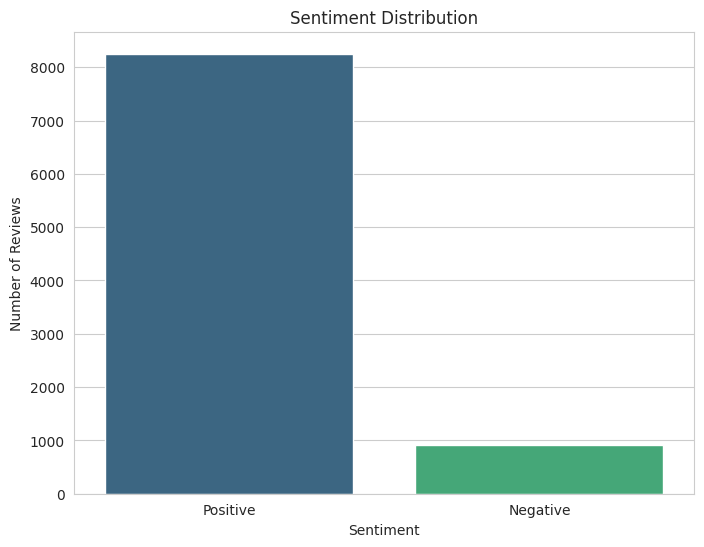

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

**Reasoning**:
The previous `countplot` call generated a `FutureWarning` about the `palette` argument. To address this, I will modify the call by explicitly setting `hue='sentiment'` and `legend=False`. Additionally, I will complete the subtask by generating a word cloud from the `top_negative_words` DataFrame, which will involve importing `WordCloud`, converting word frequencies to a dictionary, and displaying the word cloud.



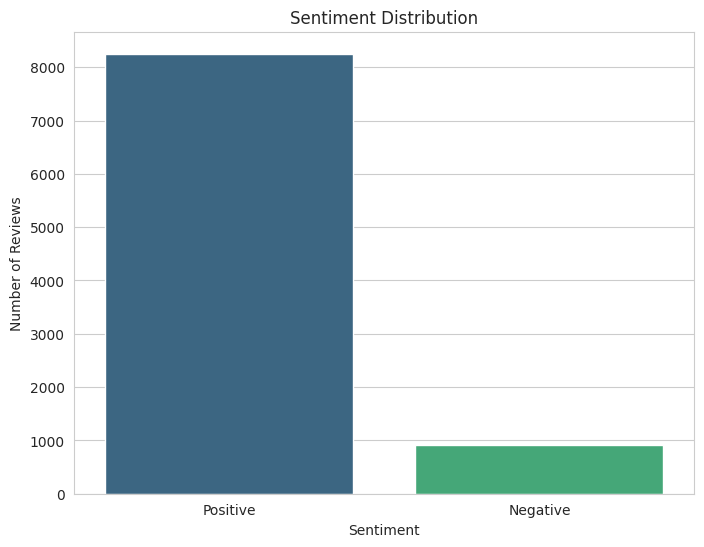

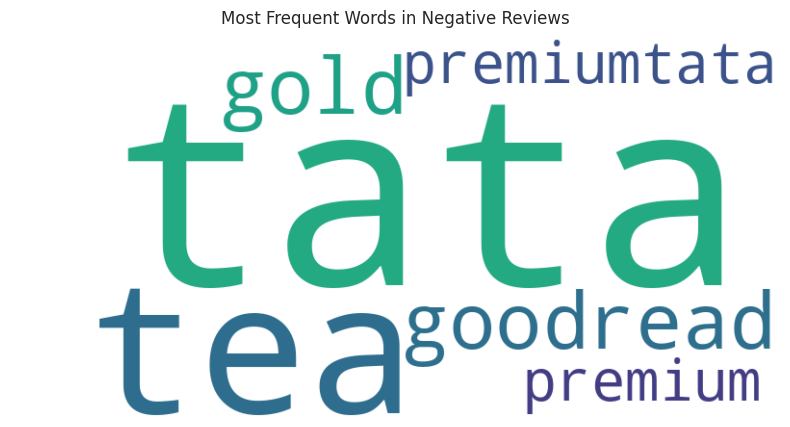

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='viridis', legend=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

# Generate word cloud for negative reviews
if not negative_reviews.empty:
    # Convert the top_negative_words DataFrame into a dictionary of word frequencies
    word_freq_dict = dict(zip(top_negative_words['word'], top_negative_words['count']))

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Frequent Words in Negative Reviews')
    plt.show()
else:
    print("No negative reviews to generate word cloud.")

## Final Task

### Subtask:
Summarize the sentiment analysis results, including the overall sentiment, key pain points identified, and potential actionable insights for the product.
